In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel(r"C:\Users\kriti\kriti python\Hourly Patient Data.xlsx")

In [3]:
data['Time'] = pd.to_datetime(data['Time'])

In [4]:
data.set_index('Time', inplace=True)

In [5]:
data.drop(columns=['ESI 1', 'ESI 2', 'ESI 3', 'ESI 5'], inplace=True)

In [6]:
esi1_daily = data['ESI 4'].resample('D').sum()

In [7]:
esi1_daily_df = esi1_daily.reset_index()

In [8]:
esi1_daily_df.columns = ['Date', 'ESI 4']

In [9]:
print(esi1_daily_df)

           Date  ESI 4
0    2017-01-01     47
1    2017-01-02     66
2    2017-01-03     51
3    2017-01-04     41
4    2017-01-05     46
...         ...    ...
1456 2020-12-27     36
1457 2020-12-28     40
1458 2020-12-29     51
1459 2020-12-30     38
1460 2020-12-31     37

[1461 rows x 2 columns]


In [10]:
train_size = int(len(esi1_daily_df) * 0.9)  
train, test = esi1_daily_df.iloc[:train_size], esi1_daily_df.iloc[train_size:]

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(np.array(train.index).reshape(-1, 1))
y_train = train['ESI 4'].values

In [12]:
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

In [13]:
svr_model.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

In [14]:
X_test = scaler.transform(np.array(test.index).reshape(-1, 1))
forecast_values = svr_model.predict(X_test)

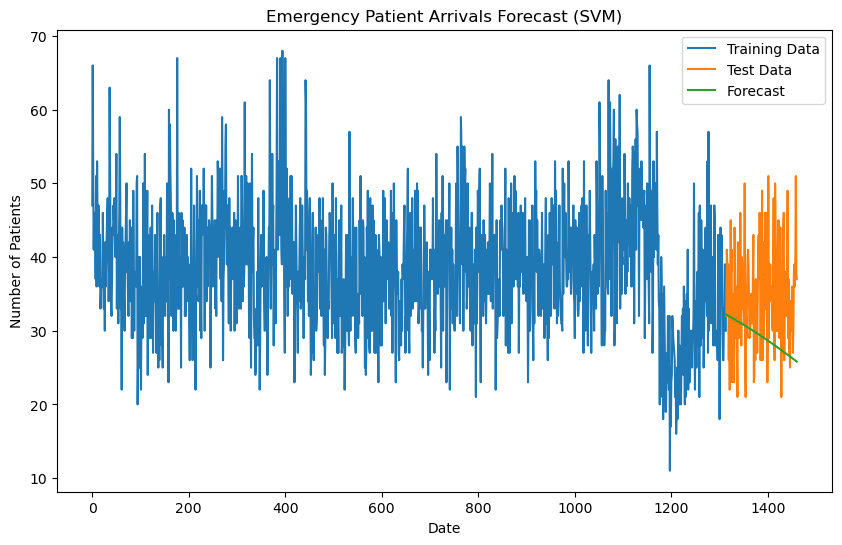

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['ESI 4'], label='Training Data')
plt.plot(test.index, test['ESI 4'], label='Test Data')
plt.plot(test.index, forecast_values, label='Forecast')
plt.title('Emergency Patient Arrivals Forecast (SVM)')
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

In [16]:
def mean_absolute_percentage_error(actual, forecast):
  
   
    actual, forecast = np.array(actual), np.array(forecast)
    return np.mean(np.abs((actual - forecast) / actual)) * 100

In [17]:
mape = mean_absolute_percentage_error(test['ESI 4'], forecast_values)
print("MAPE:", mape)

MAPE: 20.111925756641256


In [18]:
def root_mean_squared_error(actual, forecast):
    
    actual, forecast = np.array(actual), np.array(forecast)
    return np.sqrt(np.mean((actual - forecast) ** 2))

In [19]:
rmse = root_mean_squared_error(test['ESI 4'], forecast_values)
print("RMSE:", rmse)

RMSE: 9.305039571263627


In [20]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


mae = mean_absolute_error(test['ESI 4'], forecast_values)
print("MAE:", mae)

MAE: 7.481470767133485
